In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Generate test data
def find_dominant_value(array):
    unique, counts = np.unique(array, return_counts=True)
    count_dict = dict(zip(unique, counts))
    return 0 if count_dict.get(0, 0) > count_dict.get(1, 0) else 1

def sawtooth_signal(A, f, t):
    T = 1 / f
    return  A * (t / T - np.floor(t / T))

def square_signal(A, f, t):
    T = 1 / f
    return 0.5*A + 0.5 * A * np.where(np.sin(2 * np.pi * f * t) > 0, 1, -1)

def random_signal(A, f, t, window_size):
    signal = np.zeros(len(t))
    labels = np.zeros(len(t))
    num_windows = int(len(t) // window_size)
    for i in range(num_windows):
        start = i * window_size
        end = (i + 1) * window_size  
        if np.random.random() > 0.3:
            signal[start:end] = square_signal(A, f, t[start:end]) + np.random.normal(0,0.001,len( t[start:end]))
            labels[start:end] = 0
        else:
            signal[start:end] = 0.5*A + 0.5*A*np.sin(8*f*t[start:end]) + np.random.normal(0,0.001,len( t[start:end]))
            labels[start:end] = 1
    return signal,labels

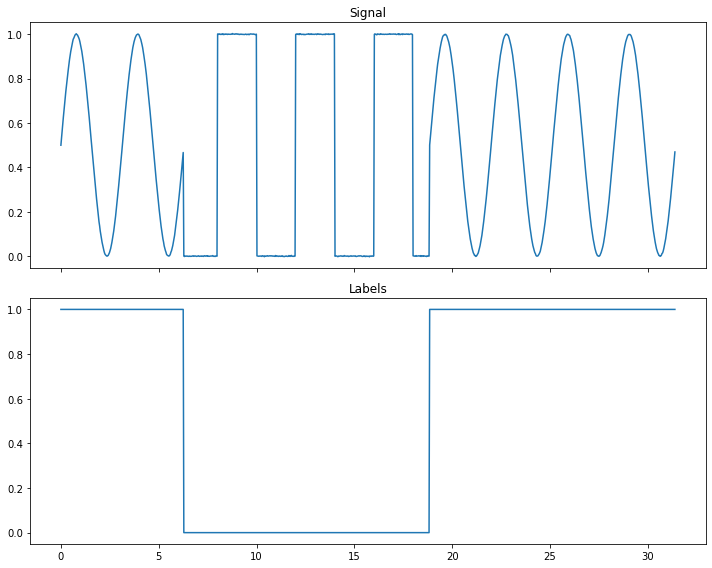

In [61]:
t = np.linspace(0, 800*np.pi, 80000)
s,l = random_signal(1, 0.25, t, 200)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
axs[0].plot(t[0:1000], s[0:1000])
axs[0].set_title("Signal")
axs[1].plot(t[0:1000], l[0:1000])
axs[1].set_title("Labels")
plt.tight_layout()
plt.show()

In [62]:
import sranodec as anom

In [63]:
# less than period
amp_window_size=50
# (maybe) same as period
series_window_size=200
# a number enough larger than period
score_window_size=400

In [64]:
spec = anom.Silency(amp_window_size, series_window_size, score_window_size)

C:\Users\GustavoSanchez\anaconda3\lib\site-packages\sranodec\util.py:31: RuntimeWarning: invalid value encountered in double_scalars
  slope = [(last_value - v) / i for (i, v) in enumerate(values[::-1])]


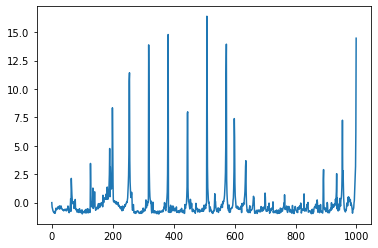

In [65]:
score = spec.generate_anomaly_score(s)
plt.plot(score[0:1000])

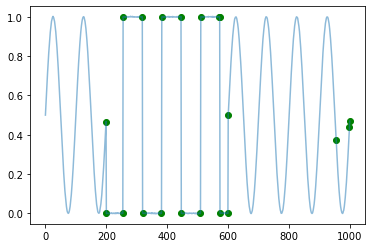

In [67]:
# Plot data with estimated anomalous points
s1000 = s[0:1000]
plt.plot(s1000, alpha=0.5, label="observation")
index_changes = np.where(score[0:1000] > np.percentile(score[0:1000], 98))[0]
plt.scatter(index_changes, s1000[index_changes], c='green', label="change point")